In [628]:
# importing required libraries
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

In [629]:
# Supressing the warnings
import warnings
warnings.simplefilter('ignore')

In [630]:
#importing dataset
df = pd.read_csv('day.csv', parse_dates = [1])
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [631]:
#Checking the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null datetime64[ns]
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(11)
memory usage: 91.3 KB


### Inference: No null values are present in the dataset and all columns are in the required datatype

In [632]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [633]:
# Checking the category count of columns season, yr, mnth, holiday, weekday,workingday, weathersit
print('Season\n',df['season'].astype('category').value_counts())
print('Month\n',df['mnth'].astype('category').value_counts())
print('Year\n',df['yr'].astype('category').value_counts())
print('Holiday\n',df['holiday'].astype('category').value_counts())
print('Workingday\n',df['workingday'].astype('category').value_counts())
print('Weekday\n',df['weekday'].astype('category').value_counts())
print('Weather\n',df['weathersit'].astype('category').value_counts())

Season
 3    188
2    184
1    180
4    178
Name: season, dtype: int64
Month
 12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
Year
 1    365
0    365
Name: yr, dtype: int64
Holiday
 0    709
1     21
Name: holiday, dtype: int64
Workingday
 1    504
0    226
Name: workingday, dtype: int64
Weekday
 2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64
Weather
 1    463
2    246
3     21
Name: weathersit, dtype: int64


### Inference: In WeatherSit column only 3 categories are provided in the dataset whereas 4 categories are provided in the dictionary

In [634]:
# Converting required columns in the correct categorical form for easy readability
def seasonMapping(x):
    return x.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

def weekMapping(x):
    return x.map({0:'Sun',1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5: 'Fri', 6:'Sat'})

def monthMapping(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5: 'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

def weatherMapping(x):
    return x.map({1:'Clear', 2:'Mist', 3:'Light_Rain', 4:'Heavy_Rain', 5: 'Fri', 6:'Sat'})

df['season'] = df[['season']].apply(seasonMapping)
df['mnth'] = df[['mnth']].apply(monthMapping)
df['weekday'] = df[['weekday']].apply(weekMapping)
df['weathersit'] = df[['weathersit']].apply(weatherMapping)

In [635]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,Spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,Spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


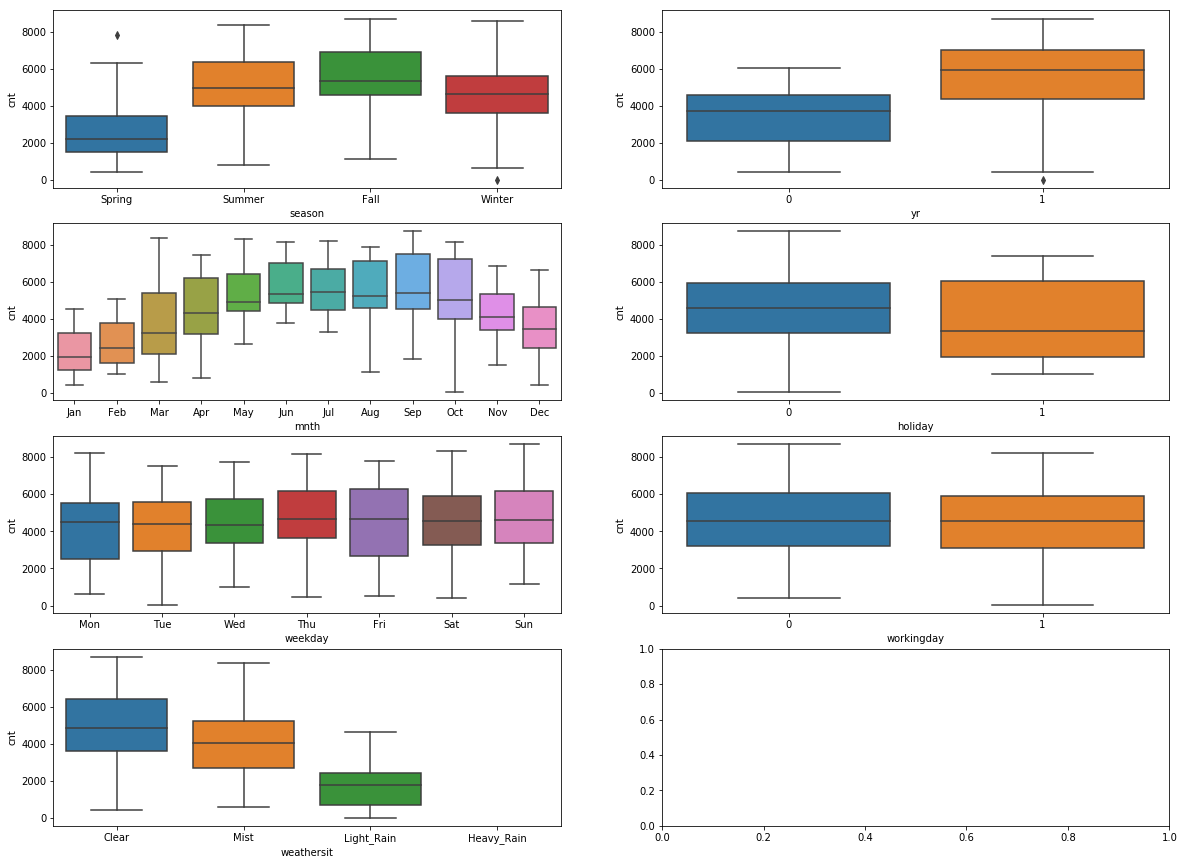

In [636]:
# Above description doesn't show any outlier, but let's draw a boxplot to see that more effectively
fig, axs = plt.subplots(4,2, figsize=(20,15))
sns.boxplot(x = 'season', y = 'cnt', data = df, ax =axs[0][0])
sns.boxplot(x = 'yr', y = 'cnt', data = df, ax =axs[0][1])
sns.boxplot(x = 'mnth', y = 'cnt', data = df, ax =axs[1][0])
sns.boxplot(x = 'holiday', y = 'cnt', data = df, ax =axs[1][1])
sns.boxplot(x = 'weekday', y = 'cnt', data = df, ax =axs[2][0])
sns.boxplot(x = 'workingday', y = 'cnt', data = df, ax =axs[2][1])
sns.boxplot(x = 'weathersit', y = 'cnt', data = df, ax =axs[3][0], order = ['Clear','Mist','Light_Rain','Heavy_Rain'])
plt.show()

### Inference:
### 1. No major outliers in cnt variable
### 2. Month, season, weathersit, holiday & Yr shows good pattern in the demand of shared bikes

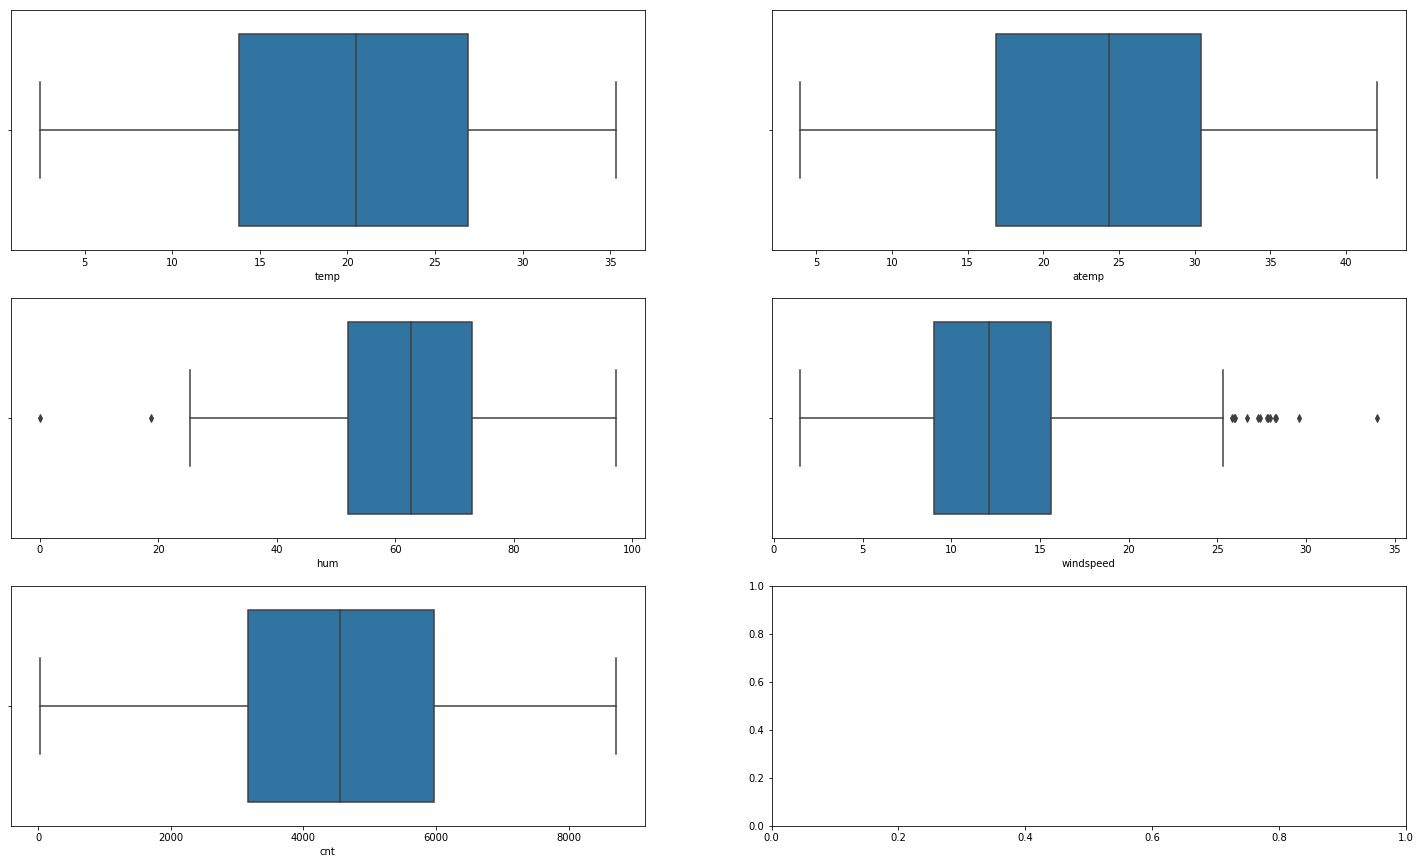

In [637]:
fig, axs = plt.subplots(3,2, figsize=(25,15))
sns.boxplot(df['temp'], ax =axs[0][0])
sns.boxplot(df['atemp'], ax =axs[0][1])
sns.boxplot(df['hum'], ax =axs[1][0])
sns.boxplot(df['windspeed'], ax =axs[1][1])
sns.boxplot(df['cnt'], ax =axs[2][0])
plt.show()

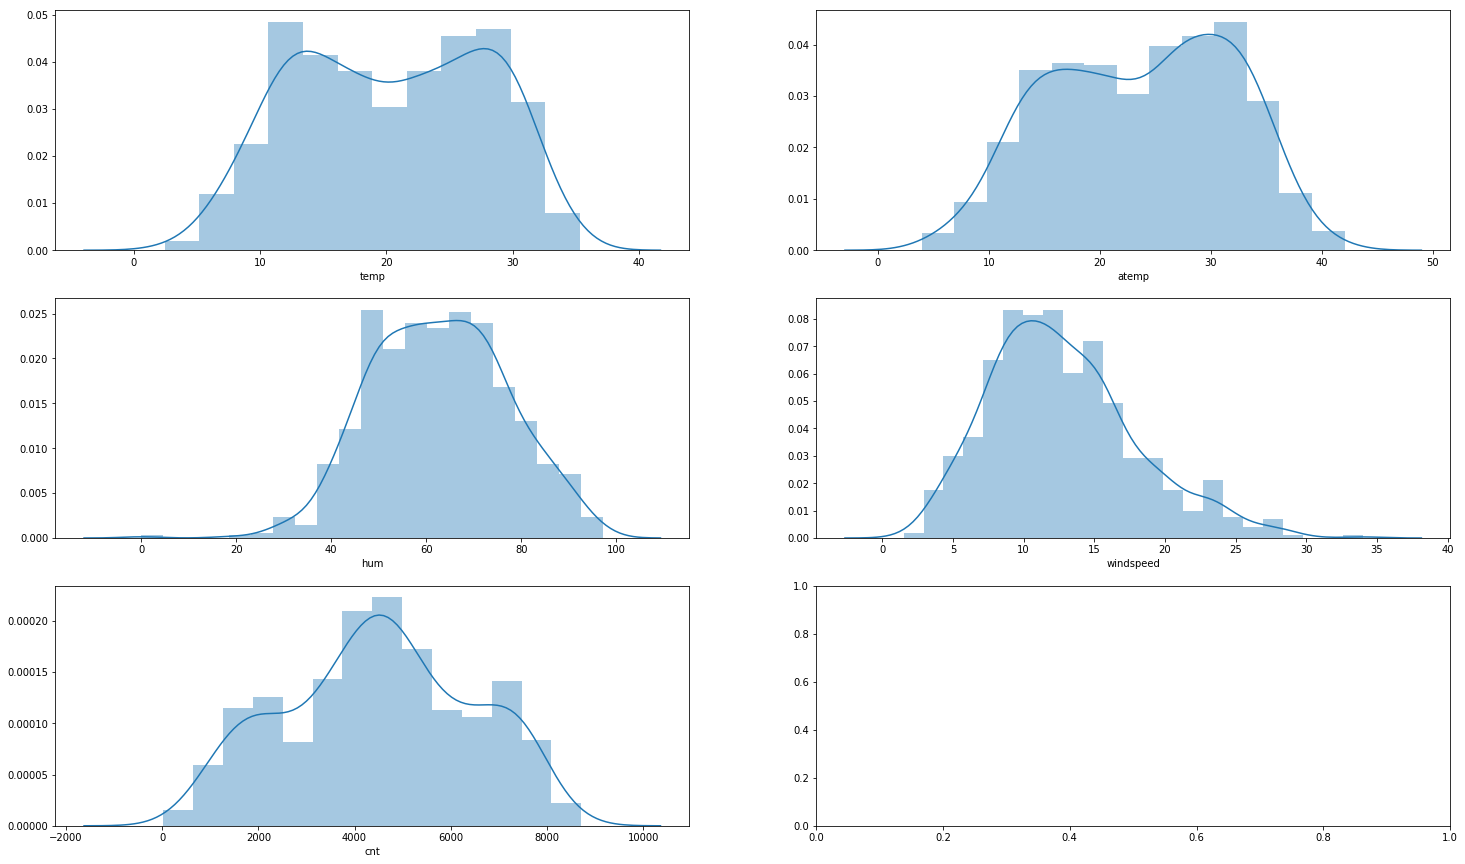

In [638]:
#PLotting distplot to see the diribution of the continous data
fig, axs = plt.subplots(3,2, figsize=(25,15))
sns.distplot(df['temp'], ax =axs[0][0])
sns.distplot(df['atemp'], ax =axs[0][1])
sns.distplot(df['hum'], ax =axs[1][0])
sns.distplot(df['windspeed'], ax =axs[1][1])
sns.distplot(df['cnt'], ax =axs[2][0])
plt.show()

### Inference: Distribution of continous data looks normal and it is not skewed at either of the side.

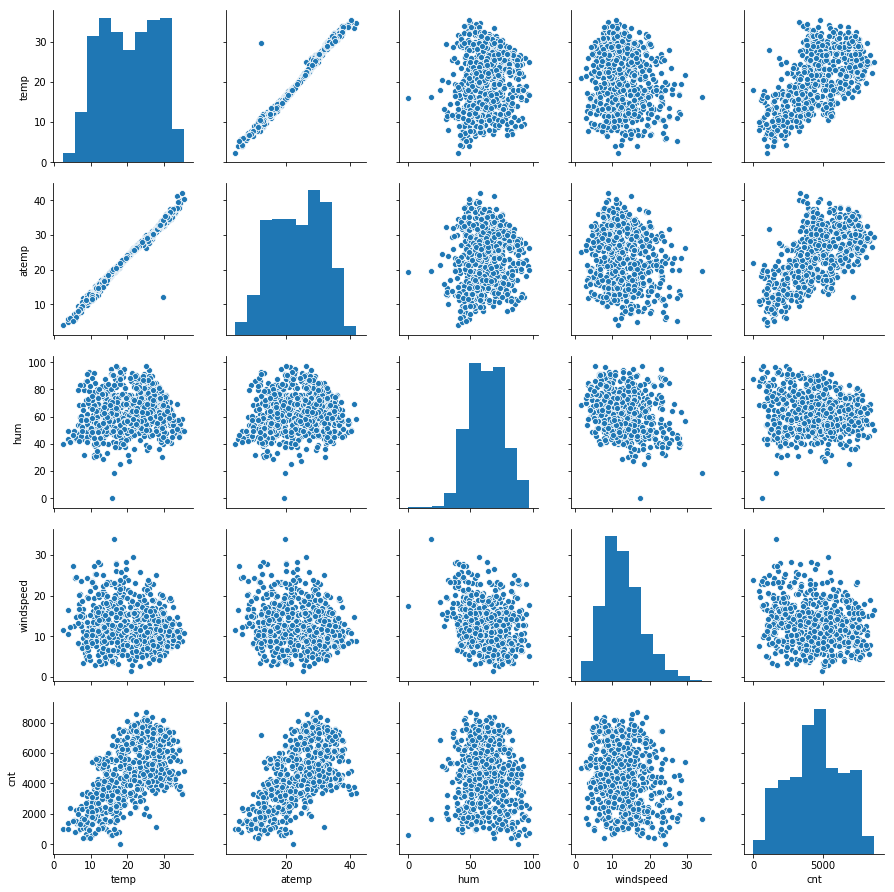

In [639]:
sns.pairplot(df[['temp','atemp','hum','windspeed','cnt']])
plt.show()

### Inference: 
### 1. temp and atemp variable shows a posive trend with the target variable i.e cnt
### 2. temp and atemp variable are highly correlated.

In [640]:
#Dropping column instant as it is just a incremental number of records
#Dropping column  casual, registered as addition of these two values gives us cnt variable which is our target variable
#Dropping dteday as it is just showing the incrementing date
df.drop(columns= ['dteday','instant','casual','registered'], axis = 1, inplace = True)

In [641]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [642]:
# Method to convert variable to dummy categorical features
def dummiesVariable(var, df):
    status = pd.get_dummies(df[var], drop_first = True)
    return pd.concat([df,status], axis= 1)

In [643]:
#Converting columns season, mnth, weekday to categorical
df = dummiesVariable('season', df)
df.drop(columns = ['season'], inplace = True)
df = dummiesVariable('mnth', df)
df.drop(columns = ['mnth'], inplace = True)
df = dummiesVariable('weekday', df)
df.drop(columns = ['weekday'], inplace = True)

In [644]:
df.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,1,Mist,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,Mist,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [645]:
#Coverting weathersit separately because it has 3 categories provided in the dataset wheras 4 categories are provided in the dictionary
# Thus making it future proof if 4th category comes
# Logic: Dropping last category if it comes otherwise not dropping any category
status = pd.get_dummies(df['weathersit'])
if len(status.columns) ==4:
    status = status.iloc[:,:3]
df = pd.concat([df,status], axis= 1)
df.drop(columns = ['weathersit'], inplace = True)

In [646]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Clear,Light_Rain,Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


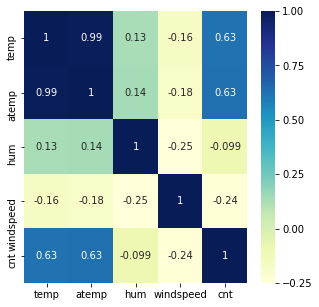

In [647]:
#Checking Correlation between CNT and other continous features
corr = df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize = (5,5))
sns.heatmap(corr, annot = True, cmap= 'YlGnBu')
plt.show()

In [648]:
# Dropping variable temp as atemp and temp have a high correlation, the reason why temp should be dropped and not a temp is that
# atemp gives us information about what is the temperature that people are feeling which is more important whereas temp is 
# an absolute number
df.drop(columns = ['temp'], inplace = True)

In [649]:
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Clear,Light_Rain,Mist
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [650]:
# Divinding data into features and target
y = df.pop('cnt')
X= df

In [651]:
#Dividing data into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7, random_state = 99)

In [652]:
#Performing Scaling 
scale_vars = ['atemp', 'hum', 'windspeed']
scaler = MinMaxScaler()
X_train[scale_vars] = scaler.fit_transform(X_train[scale_vars])

In [653]:
#Creating a model so as to set the baseline
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [654]:
# Checking r2score of the above model
X_test[scale_vars] = scaler.transform(X_test[scale_vars])
y_test_pred = lm.predict(X_test)
r2_score(y_true = y_test, y_pred = y_test_pred)

0.7935459035040002

In [655]:
#Creating a model so as to choose features on the basis of RFE
rfe = RFE(lm,20)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 4),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', True, 1),
 ('Mar', False, 5),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', False, 3),
 ('Sun', False, 6),
 ('Thu', False, 10),
 ('Tue', True, 1),
 ('Wed', False, 8),
 ('Clear', True, 1),
 ('Light_Rain', True, 1),
 ('Mist', True, 1)]

In [656]:
#Selecting vaiables selected by RFE
selected_vars = [val[0] if val[1] == True else None for val in list(zip(X_train.columns, rfe.support_))]
selected_vars = list(filter(lambda x: x!=None, selected_vars))

In [657]:
selected_vars

['yr',
 'holiday',
 'atemp',
 'hum',
 'windspeed',
 'Spring',
 'Summer',
 'Winter',
 'Dec',
 'Feb',
 'Jan',
 'Jul',
 'Jun',
 'May',
 'Nov',
 'Sep',
 'Tue',
 'Clear',
 'Light_Rain',
 'Mist']

## Model 1 - Generated using selected RFE columns

In [658]:
#Using variables defined by RFE
X_train = X_train[selected_vars]
X_test = X_test[selected_vars]
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     158.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.79e-195
Time:                        19:58:31   Log-Likelihood:                -4078.1
No. Observations:                 510   AIC:                             8196.
Df Residuals:                     490   BIC:                             8281.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2278.1119    254.361      8.956      0.000    1778.340    2777.884
yr          2141.2818     66.832     32.040      0.000    2009.969    2272.595
holiday     -513.6892    201.159     -2.554      0.011    -908.930    -118.449
atemp       3118.7481    353.234      8.829      0.000    2424.707    3812.789
hum        -1376.1365    323.420     -4.255      0.000   -2011.597    -740.676
windspeed   -978.9533    191.052     -5.124      0.000   -1354.335    -603.572
Spring     -1084.6797    176.544     -6.144      0.000   -1431.557    -737.802
Summer      -166.5502    141.722     -1.175      0.240    -445.008     111.907
Winter       692.4179    141.119      4.907      0.000     415.145     969.691
Dec         -721.0554    150.592     -4.788      0.000   -1016.941    -425.170
Feb         -382.2205    173.571     -2.202      0.028    -723.255     -41.186
Jan         -611.2787    179.567     -3.404      0.001    -964.095    -258.463
Jul         -461.5253    154.061     -2.996      0.003    -764.227    -158.824
Jun          253.1193    150.242      1.685      0.093     -42.079     548.318
May          211.6168    160.188      1.321      0.187    -103.123     526.357
Nov         -930.7784    157.338     -5.916      0.000   -1239.919    -621.638
Sep          385.9126    141.985      2.718      0.007     106.938     664.887
Tue         -253.7604     97.708     -2.597      0.010    -445.739     -61.782
Clear       1429.4049     90.852     15.733      0.000    1250.897    1607.913
Light_Rain   -55.4917    187.758     -0.296      0.768    -424.402     313.418
Mist         904.1986    110.200      8.205      0.000     687.677    1120.721
==============================================================================
Omnibus:                       52.398   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.386
Skew:                          -0.642   Prob(JB):                     5.27e-21
Kurtosis:                       4.658   Cond. No.                     2.25e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.93e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Model 1 Prediction

In [659]:
# Predicting values for test
#Adding constant
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)

In [660]:
#Checking r2 score
print('R2 Score:',r2_score(y_true = y_test, y_pred = y_test_pred))

R2 Score: 0.7908188743109266


In [661]:
## Checking error terms
print('Mean Squared Error:', mean_squared_error(y_test,y_test_pred ))
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test,y_test_pred )))

Mean Squared Error: 809605.1755051522
Root Mean Squared Error: 899.7806263224121


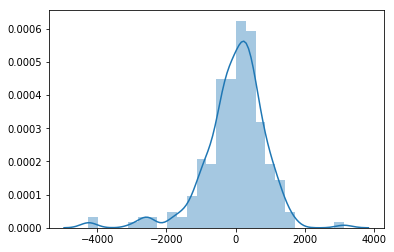

In [662]:
#Plotting distribution of residuals to see whether residuals are distributed normally
res = y_test - y_test_pred
sns.distplot(res)

### Inference: The residuals are normally distribued

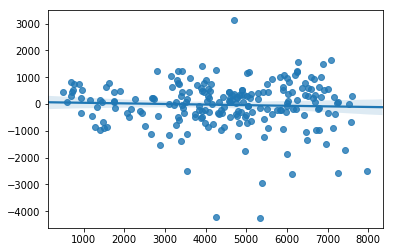

In [663]:
# Plotting scatter plot to see distribution of residuals with predicted value
sns.regplot(x=y_test_pred, y=res)
plt.show()

### Inference: No pattern in the distribution of the residuals with predicted values and error terms are centered around zero

In [664]:
# Lets' generate the VIF of the variables to see the multicolliearity
def generateVIF(cols, df):
    df = df[cols]
    vif = pd.DataFrame()
    vif['features'] = df.columns
    vif['VIF'] = [variance_inflation_factor (df.values, i) for i in range (df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending  = False)
    return vif

In [665]:
generateVIF(list(X_train.columns), X_train)

,features,VIF
17,Clear,59.99
19,Mist,34.78
5,Spring,5.47
2,atemp,5.35
18,Light_Rain,4.34
7,Winter,3.55
6,Summer,3.49
10,Jan,2.26
3,hum,2.03
9,Feb,2.02


## Model 2 - Removing Light_Rain Column because P-value is quite high(.768)

In [666]:
X_train.pop('Light_Rain')
X_test.pop('Light_Rain')

580    0
199    0
725    0
144    0
477    0
386    0
113    0
569    0
677    0
214    0
22     0
191    0
362    0
107    0
15     0
84     0
548    0
74     0
664    0
500    0
651    0
632    0
146    0
124    0
372    0
48     0
667    0
129    0
40     0
301    1
      ..
666    1
601    0
645    0
554    0
111    0
716    0
17     0
578    0
287    0
288    0
195    0
358    0
615    0
152    0
623    0
396    0
366    0
253    0
300    0
343    0
544    0
489    0
137    0
126    0
462    0
217    0
393    0
638    0
338    0
435    0
Name: Light_Rain, Length: 220, dtype: uint8

In [667]:
X_test.head()

,yr,holiday,atemp,hum,windspeed,Spring,Summer,Winter,Dec,Feb,Jan,Jul,Jun,May,Nov,Sep,Tue,Clear,Mist
580,1,0,0.882350,0.630677,0.560788,0,0,0,0,0,0,0,0,0,0,0,0,1,0
199,0,0,0.877378,0.668809,0.258148,0,0,0,0,0,0,1,0,0,0,0,0,1,0
725,1,0,0.193709,0.671380,0.781879,1,0,0,1,0,0,0,0,0,0,0,0,0,1
144,0,0,0.704192,0.715938,0.314528,0,1,0,0,0,0,0,0,1,0,0,0,1,0
477,1,0,0.291478,0.788347,0.670619,0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [668]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     158.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.79e-195
Time:                        19:58:35   Log-Likelihood:                -4078.1
No. Observations:                 510   AIC:                             8196.
Df Residuals:                     490   BIC:                             8281.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2222.6202    408.362      5.443      0.000    1420.263    3024.978
yr          2141.2818     66.832     32.040      0.000    2009.969    2272.595
holiday     -513.6892    201.159     -2.554      0.011    -908.930    -118.449
atemp       3118.7481    353.234      8.829      0.000    2424.707    3812.789
hum        -1376.1365    323.420     -4.255      0.000   -2011.597    -740.676
windspeed   -978.9533    191.052     -5.124      0.000   -1354.335    -603.572
Spring     -1084.6797    176.544     -6.144      0.000   -1431.557    -737.802
Summer      -166.5502    141.722     -1.175      0.240    -445.008     111.907
Winter       692.4179    141.119      4.907      0.000     415.145     969.691
Dec         -721.0554    150.592     -4.788      0.000   -1016.941    -425.170
Feb         -382.2205    173.571     -2.202      0.028    -723.255     -41.186
Jan         -611.2787    179.567     -3.404      0.001    -964.095    -258.463
Jul         -461.5253    154.061     -2.996      0.003    -764.227    -158.824
Jun          253.1193    150.242      1.685      0.093     -42.079     548.318
May          211.6168    160.188      1.321      0.187    -103.123     526.357
Nov         -930.7784    157.338     -5.916      0.000   -1239.919    -621.638
Sep          385.9126    141.985      2.718      0.007     106.938     664.887
Tue         -253.7604     97.708     -2.597      0.010    -445.739     -61.782
Clear       1484.8966    222.373      6.677      0.000    1047.974    1921.819
Mist         959.6903    212.493      4.516      0.000     542.181    1377.199
==============================================================================
Omnibus:                       52.398   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.386
Skew:                          -0.642   Prob(JB):                     5.27e-21
Kurtosis:                       4.658   Cond. No.                         27.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [669]:
generateVIF(list(X_train.columns), X)

,features,VIF
2,atemp,40.03
3,hum,28.96
17,Clear,17.99
18,Mist,9.79
4,windspeed,6.82
5,Spring,6.54
6,Summer,4.10
7,Winter,4.03
10,Jan,2.52
9,Feb,2.18


## Model 2 Prediction

In [670]:
# Predicting values for test
#Adding constant
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)
print('R2 Score:',r2_score(y_true = y_test, y_pred = y_test_pred))

R2 Score: 0.7908188743109263


In [671]:
## Checking error terms
print('Mean Squared Error:', mean_squared_error(y_test,y_test_pred ))
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test,y_test_pred)))

Mean Squared Error: 809605.1755051531
Root Mean Squared Error: 899.7806263224127


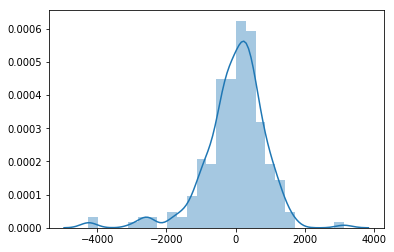

In [672]:
#Plotting distribution of residuals to see whether residuals are distributed normally
res = y_test - y_test_pred
sns.distplot(res)
plt.show()

### Inference: The residuals are normally distribued

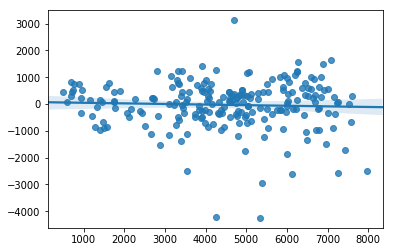

In [673]:
# Plotting scatter plot to see distribution of residuals with predicted value
sns.regplot(x=y_test_pred, y=res)
plt.show()

### Inference: No pattern in the distribution of the residuals with predicted values and error terms are centered around zero

## Model 3 - Removing Summer Column because P-value is .24

In [674]:
X_train.pop('Summer')
X_test.pop('Summer')
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     166.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.25e-196
Time:                        19:58:37   Log-Likelihood:                -4078.9
No. Observations:                 510   AIC:                             8196.
Df Residuals:                     491   BIC:                             8276.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2064.2241    385.628      5.353      0.000    1306.540    2821.908
yr          2135.8495     66.698     32.023      0.000    2004.801    2266.898
holiday     -526.8903    200.923     -2.622      0.009    -921.665    -132.116
atemp       3316.3271    310.778     10.671      0.000    2705.707    3926.947
hum        -1407.7406    322.425     -4.366      0.000   -2041.243    -774.238
windspeed   -999.6666    190.311     -5.253      0.000   -1373.591    -625.743
Spring      -967.9322    145.998     -6.630      0.000   -1254.790    -681.075
Winter       779.7590    120.009      6.497      0.000     543.964    1015.554
Dec         -680.7190    146.685     -4.641      0.000    -968.927    -392.511
Feb         -352.0995    171.734     -2.050      0.041    -689.524     -14.675
Jan         -569.7958    176.132     -3.235      0.001    -915.860    -223.731
Jul         -424.8156    150.919     -2.815      0.005    -721.343    -128.288
Jun          189.5971    140.237      1.352      0.177     -85.941     465.135
May          121.1388    140.528      0.862      0.389    -154.971     397.248
Nov         -891.5139    153.809     -5.796      0.000   -1193.720    -589.308
Sep          438.6153    134.769      3.255      0.001     173.820     703.410
Tue         -248.1912     97.631     -2.542      0.011    -440.017     -56.366
Clear       1472.4645    222.208      6.627      0.000    1035.869    1909.060
Mist         945.7947    212.246      4.456      0.000     528.773    1362.816
==============================================================================
Omnibus:                       51.278   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.739
Skew:                          -0.636   Prob(JB):                     3.26e-20
Kurtosis:                       4.614   Cond. No.                         26.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 3 Prediction

In [675]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)
print('R2 Score:',r2_score(y_true = y_test, y_pred = y_test_pred))

R2 Score: 0.7925003690023369


In [676]:
generateVIF(list(X_train.columns), X)

,features,VIF
2,atemp,34.36
3,hum,25.40
16,Clear,15.39
17,Mist,8.85
4,windspeed,6.22
5,Spring,4.94
6,Winter,3.10
9,Jan,2.47
8,Feb,2.17
0,yr,2.05


In [677]:
## Checking error terms
print('Mean Squared Error:', mean_squared_error(y_test,y_test_pred ))
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test,y_test_pred) ))

Mean Squared Error: 803097.1944420148
Root Mean Squared Error: 896.1569028033064


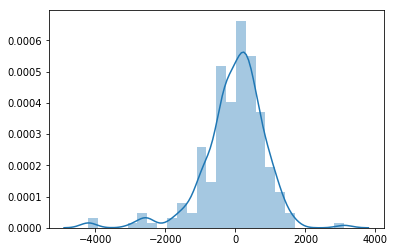

In [678]:
#Plotting distribution of residuals to see whether residuals are distributed normally
res = y_test - y_test_pred
sns.distplot(res)
plt.show()

### Inference: The residuals are normally distribued

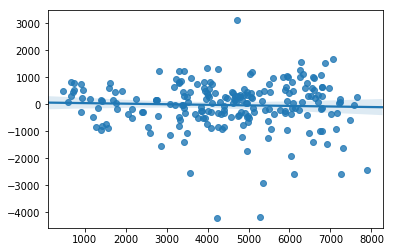

In [679]:
# Plotting scatter plot to see distribution of residuals with predicted value
sns.regplot(x=y_test_pred, y=res)
plt.show()

### Inference: No pattern in the distribution of the residuals with predicted values and error terms are centered around zero

### R2 score on test set improved in Model 3

## Model 4 - Removing May Column because P-value is high (.389)

In [680]:
X_train.pop('May')
X_test.pop('May')
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     176.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.77e-197
Time:                        19:58:41   Log-Likelihood:                -4079.2
No. Observations:                 510   AIC:                             8194.
Df Residuals:                     492   BIC:                             8271.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2059.3452    385.485      5.342      0.000    1301.945    2816.746
yr          2137.8833     66.639     32.082      0.000    2006.951    2268.815
holiday     -524.5431    200.852     -2.612      0.009    -919.176    -129.910
atemp       3336.0651    309.853     10.767      0.000    2727.267    3944.863
hum        -1381.7148    320.924     -4.305      0.000   -2012.266    -751.163
windspeed  -1002.9508    190.223     -5.273      0.000   -1376.700    -629.201
Spring      -992.9988    143.035     -6.942      0.000   -1274.034    -711.963
Winter       752.4997    115.738      6.502      0.000     525.098     979.901
Dec         -681.1046    146.646     -4.645      0.000    -969.234    -392.975
Feb         -350.1695    171.675     -2.040      0.042    -687.476     -12.863
Jan         -567.8121    176.071     -3.225      0.001    -913.755    -221.869
Jul         -459.8565    145.304     -3.165      0.002    -745.350    -174.363
Jun          156.5004    134.843      1.161      0.246    -108.439     421.440
Nov         -891.1006    153.768     -5.795      0.000   -1193.224    -588.977
Sep          410.1389    130.623      3.140      0.002     153.490     666.788
Tue         -247.9557     97.605     -2.540      0.011    -439.730     -56.182
Clear       1481.0072    221.929      6.673      0.000    1044.962    1917.052
Mist         952.9018    212.030      4.494      0.000     536.306    1369.498
==============================================================================
Omnibus:                       50.279   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.237
Skew:                          -0.633   Prob(JB):                     1.88e-19
Kurtosis:                       4.567   Cond. No.                         26.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [681]:
generateVIF(list(X_train.columns), X)

,features,VIF
2,atemp,34.24
3,hum,25.00
15,Clear,15.32
16,Mist,8.83
4,windspeed,6.22
5,Spring,4.70
6,Winter,2.85
9,Jan,2.47
8,Feb,2.17
0,yr,2.05


## Model 4 prediction

In [682]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)
print('R2 Score:',r2_score(y_true = y_test, y_pred = y_test_pred))

R2 Score: 0.790088917500267


In [683]:
## Checking error terms
print('Mean Squared Error:', mean_squared_error(y_test,y_test_pred ))
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test,y_test_pred) ))

Mean Squared Error: 812430.3673567518
Root Mean Squared Error: 901.349192797526


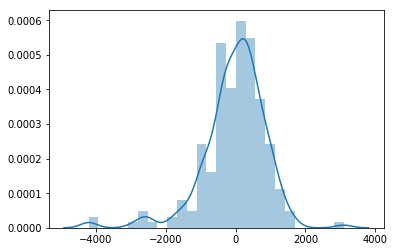

In [684]:
# Lets' see the distribution of residuals
res = y_test - y_test_pred
sns.distplot(res)
plt.show()

### Inference: The residuals are normally distribued

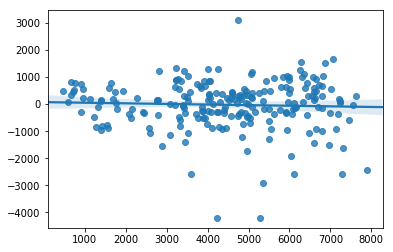

In [685]:
# Plotting scatter plot to see distribution of residuals with predicted value
sns.regplot(x=y_test_pred, y=res)
plt.show()

### Inference: No pattern in the distribution of the residuals with predicted values and error terms are centered around zero

## Model 5 - Removing Jun Column because P-value is high(.246)

In [686]:
X_train.pop('Jun')
X_test.pop('Jun')
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     187.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.09e-197
Time:                        19:58:44   Log-Likelihood:                -4079.9
No. Observations:                 510   AIC:                             8194.
Df Residuals:                     493   BIC:                             8266.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2085.1909    384.977      5.416      0.000    1328.793    2841.589
yr          2134.4261     66.596     32.050      0.000    2003.579    2265.273
holiday     -533.0707    200.788     -2.655      0.008    -927.577    -138.565
atemp       3449.7649    294.062     11.731      0.000    2871.996    4027.534
hum        -1450.1885    315.566     -4.596      0.000   -2070.208    -830.169
windspeed  -1011.2721    190.155     -5.318      0.000   -1384.886    -637.659
Spring     -1006.9779    142.578     -7.063      0.000   -1287.112    -726.843
Winter       734.8419    114.774      6.403      0.000     509.336     960.348
Dec         -664.8236    146.025     -4.553      0.000    -951.731    -377.916
Feb         -335.4061    171.263     -1.958      0.051    -671.902       1.090
Jan         -544.8780    175.020     -3.113      0.002    -888.755    -201.002
Jul         -520.2032    135.730     -3.833      0.000    -786.884    -253.522
Nov         -880.5172    153.552     -5.734      0.000   -1182.214    -578.821
Sep          379.7600    128.019      2.966      0.003     128.230     631.290
Tue         -245.2201     97.611     -2.512      0.012    -437.005     -53.436
Clear       1466.8536    221.671      6.617      0.000    1031.317    1902.391
Mist         941.8421    211.890      4.445      0.000     525.523    1358.162
==============================================================================
Omnibus:                       49.477   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.470
Skew:                          -0.626   Prob(JB):                     4.54e-19
Kurtosis:                       4.552   Cond. No.                         26.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [687]:
generateVIF(X_train.columns,X_train)

,features,VIF
2,atemp,23.40
3,hum,23.18
14,Clear,14.90
15,Mist,8.53
4,windspeed,5.01
5,Spring,4.45
6,Winter,3.07
9,Jan,2.31
8,Feb,2.11
0,yr,2.06


## Model 5 Prediction

In [688]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)
print('R2 Score:',r2_score(y_true = y_test, y_pred = y_test_pred))

R2 Score: 0.7918605504832718


In [689]:
## Checking error terms
print('Mean Squared Error:', mean_squared_error(y_test,y_test_pred ))
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test,y_test_pred) ))

Mean Squared Error: 805573.5191233779
Root Mean Squared Error: 897.5374750523667


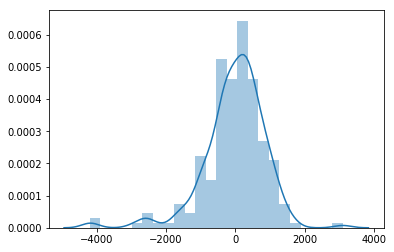

In [690]:
# Lets' see the distribution of residuals
res = y_test - y_test_pred
sns.distplot(res)
plt.show()

### Inference: The residuals are normally distribued

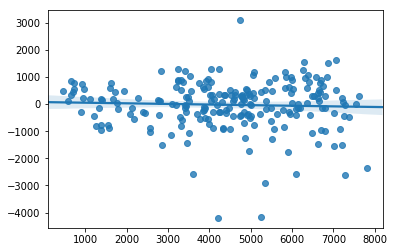

In [691]:
# Plotting scatter plot to see distribution of residuals with predicted value
sns.regplot(x=y_test_pred, y=res)
plt.show()

### Inference: No pattern in the distribution of the residuals with predicted values and error terms are centered around zero

## Model 6 - Removing Feb Column because P-value is high (.051)

In [692]:
X_train.pop('Feb')
X_test.pop('Feb')
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     198.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.09e-198
Time:                        19:58:47   Log-Likelihood:                -4081.9
No. Observations:                 510   AIC:                             8196.
Df Residuals:                     494   BIC:                             8264.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2010.9457    384.204      5.234      0.000    1256.071    2765.821
yr          2130.5448     66.757     31.915      0.000    1999.382    2261.708
holiday     -528.6573    201.351     -2.626      0.009    -924.267    -133.048
atemp       3588.9476    286.163     12.542      0.000    3026.702    4151.193
hum        -1470.7817    316.294     -4.650      0.000   -2092.230    -849.334
windspeed   -995.2825    190.524     -5.224      0.000   -1369.619    -620.946
Spring     -1136.1104    126.777     -8.961      0.000   -1385.199    -887.022
Winter       726.2471    115.019      6.314      0.000     500.261     952.233
Dec         -574.5355    138.953     -4.135      0.000    -847.548    -301.523
Jan         -358.7861    147.400     -2.434      0.015    -648.395     -69.177
Jul         -544.3732    135.555     -4.016      0.000    -810.709    -278.037
Nov         -834.9651    152.215     -5.485      0.000   -1134.033    -535.897
Sep          381.8615    128.381      2.974      0.003     129.620     634.103
Tue         -244.4040     97.890     -2.497      0.013    -436.735     -52.073
Clear       1459.3278    222.273      6.565      0.000    1022.610    1896.045
Mist         936.3650    212.479      4.407      0.000     518.891    1353.839
==============================================================================
Omnibus:                       44.417   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.706
Skew:                          -0.572   Prob(JB):                     3.64e-17
Kurtosis:                       4.502   Cond. No.                         26.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [693]:
generateVIF(X_train.columns,X_train)

,features,VIF
3,hum,22.78
2,atemp,22.24
13,Clear,14.66
14,Mist,8.46
4,windspeed,5.01
5,Spring,3.32
6,Winter,3.06
0,yr,2.05
10,Nov,1.94
8,Jan,1.64


## Model 6 Prediction

In [694]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)
print('R2 Score:',r2_score(y_true = y_test, y_pred = y_test_pred))

R2 Score: 0.7898428752012443


In [695]:
## Checking error terms
print('Mean Squared Error:', mean_squared_error(y_test,y_test_pred ))
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test,y_test_pred) ))

Mean Squared Error: 813382.6383516887
Root Mean Squared Error: 901.8772856390656


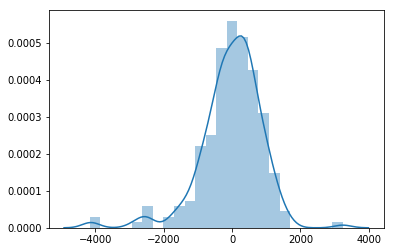

In [696]:
# Lets' see the distribution of residuals
res = y_test - y_test_pred
sns.distplot(res)
plt.show()

### Inference: The residuals are normally distribued

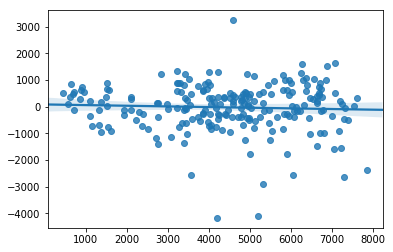

In [697]:
# Plotting scatter plot to see distribution of residuals with predicted value
sns.regplot(x=y_test_pred, y=res)
plt.show()

### Inference: No pattern in the distribution of the residuals with predicted values and error terms are centered around zero

### P-value looks under control, let's go for VIF

## Model - 7 - Removing hum Column due to high VIF (22.78)

In [698]:
X_train.pop('hum')
X_test.pop('hum')
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     202.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.32e-194
Time:                        19:58:49   Log-Likelihood:                -4092.8
No. Observations:                 510   AIC:                             8216.
Df Residuals:                     495   BIC:                             8279.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        823.0646    292.892      2.810      0.005     247.600    1398.530
yr          2174.4453     67.449     32.238      0.000    2041.924    2306.966
holiday     -513.1905    205.474     -2.498      0.013    -916.900    -109.481
atemp       3288.6540    284.529     11.558      0.000    2729.621    3847.687
windspeed   -755.6315    187.203     -4.036      0.000   -1123.441    -387.822
Spring     -1143.8588    129.380     -8.841      0.000   -1398.060    -889.658
Winter       654.1357    116.318      5.624      0.000     425.597     882.674
Dec         -621.3285    141.446     -4.393      0.000    -899.237    -343.420
Jan         -430.1821    149.621     -2.875      0.004    -724.153    -136.211
Jul         -449.4277    136.772     -3.286      0.001    -718.153    -180.703
Nov         -845.6857    155.336     -5.444      0.000   -1150.884    -540.487
Sep          310.4306    130.087      2.386      0.017      54.840     566.022
Tue         -271.1377     99.736     -2.719      0.007    -467.095     -75.181
Clear       1860.0718    209.110      8.895      0.000    1449.218    2270.925
Mist        1103.5522    213.733      5.163      0.000     683.617    1523.488
==============================================================================
Omnibus:                       41.943   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.675
Skew:                          -0.559   Prob(JB):                     1.22e-15
Kurtosis:                       4.408   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [699]:
generateVIF(X_train.columns,X_train)

,features,VIF
2,atemp,14.19
12,Clear,14.19
13,Mist,7.13
3,windspeed,5.00
4,Spring,2.97
5,Winter,2.75
0,yr,2.03
9,Nov,1.90
7,Jan,1.59
6,Dec,1.55


In [700]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)
print('R2 Score:',r2_score(y_true = y_test, y_pred = y_test_pred))

R2 Score: 0.782744624041465


In [701]:
## Checking error terms
print('Mean Squared Error:', mean_squared_error(y_test,y_test_pred ))
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test,y_test_pred) ))

Mean Squared Error: 840855.3888546893
Root Mean Squared Error: 916.9816731291249


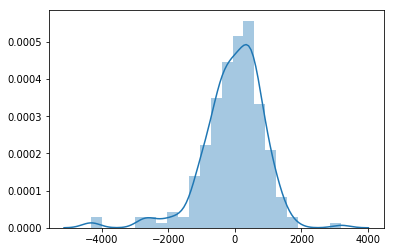

In [702]:
# Lets' see the distribution of residuals
res = y_test - y_test_pred
sns.distplot(res)
plt.show()

### Inference: The residuals are normally distribued

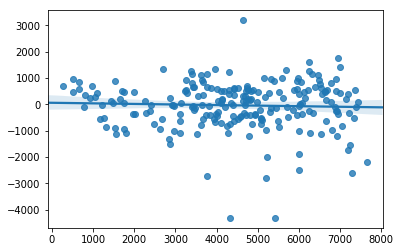

In [703]:
# Plotting scatter plot to see distribution of residuals with predicted value
sns.regplot(x=y_test_pred, y=res)
plt.show()

### Inference: No pattern in the distribution of the residuals with predicted values and error terms are centered around zero

## Model 8 - Removing atemp Column due to high VIF(14.19)

In [704]:
X_train.pop('atemp')
X_test.pop('atemp')
X_train_sm =  sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     164.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.63e-170
Time:                        19:58:51   Log-Likelihood:                -4153.8
No. Observations:                 510   AIC:                             8336.
Df Residuals:                     496   BIC:                             8395.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2937.1344    257.528     11.405      0.000    2431.154    3443.115
yr          2243.9232     75.629     29.670      0.000    2095.331    2392.515
holiday     -527.1786    231.310     -2.279      0.023    -981.647     -72.711
windspeed  -1082.8676    208.320     -5.198      0.000   -1492.167    -673.568
Spring     -2063.0123    114.888    -17.957      0.000   -2288.740   -1837.284
Winter       253.7259    125.003      2.030      0.043       8.124     499.327
Dec        -1064.3140    153.277     -6.944      0.000   -1365.466    -763.163
Jan         -852.5159    163.337     -5.219      0.000   -1173.433    -531.599
Jul          121.4345    143.582      0.846      0.398    -160.669     403.538
Nov        -1303.8941    169.079     -7.712      0.000   -1636.094    -971.695
Sep          463.7998    145.682      3.184      0.002     177.569     750.031
Tue         -293.7704    112.256     -2.617      0.009    -514.327     -73.214
Clear       1958.1219    235.213      8.325      0.000    1495.984    2420.259
Mist        1146.1859    240.575      4.764      0.000     673.514    1618.858
==============================================================================
Omnibus:                       22.091   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.035
Skew:                          -0.457   Prob(JB):                     3.66e-06
Kurtosis:                       3.585   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [705]:
generateVIF(X_train.columns, X_train)

,features,VIF
11,Clear,5.13
2,windspeed,4.91
12,Mist,3.03
4,Winter,2.71
3,Spring,2.29
0,yr,2.00
8,Nov,1.84
6,Jan,1.53
5,Dec,1.48
7,Jul,1.24


In [706]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)
print('R2 Score:', r2_score(y_true = y_test, y_pred = y_test_pred))

R2 Score: 0.724248736283859


In [707]:
## Checking error terms
print('Mean Squared Error:', mean_squared_error(y_test,y_test_pred ))
print('Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test,y_test_pred) ))

Mean Squared Error: 1067255.2292720322
Root Mean Squared Error: 1033.080456340179


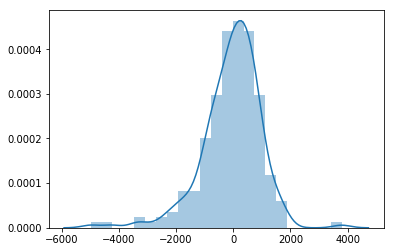

In [708]:
# Lets' see the distribution of residuals
res = y_test - y_test_pred
sns.distplot(res)
plt.show()

### Inference: The residuals are normally distribued

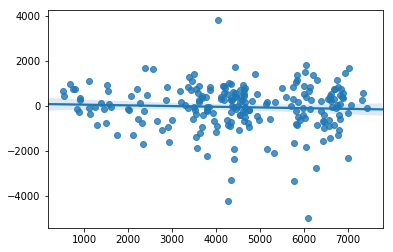

In [709]:
# Plotting scatter plot to see distribution of residuals with predicted value
sns.regplot(x=y_test_pred, y=res)
plt.show()

### Inference: No pattern in the distribution of the residuals with predicted values

## Inference: Model 7 is the Final Model as in Model 8 the RSquare Score has been dropped tremendously and error term has been increased quite rapidly, thus stopping at Model 7 and rejecting model 8

### Selected variables = yr, holiday, atemp, windspeed, Spring, Winter, Dec, Jan, Jul, Nov, Sep, Tue, Clear, Mist

### Model 7 holds good as the error term is in limit and not has been considerably increased after model 6. In addition the accuracy of the model has not been decreased significantly from the baseline model and is under control limit.

### The selected variables also are with in the line as expected such as holiday was having impact as seen in the box plot, atemp with was showing high correlation with the cnt in the scatter plot. 
### Whether the weather is clear or having mist, this pattern was also observed while we created a box plot for the weathersit with the target variable
### Yr & holiday also shows the fluctuation in demand according to year and whether it was a holiday or not respectively
### Mnth variable also shows seasonal pattern when we plotted against target variable and same has been shown when we selected the variables based on PValue and VIF for the model
### Season also showed pattern when we plotted a boxplot against target variable and thus in the final model the some seasons are selected which are contributing towards prediction of the demand of shared bikes